## PROJECT TEAM ID-PTID-CDS-FEB-24-1829

## PROJECT SUMMRY

FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solutions.

FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.

Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.

FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

Project Goal:- * Data exploration insights - Sales effectiveness. * ML model to predict the Lead Category (High Potential , Low Potential)

## IMPORTING BASIC LIBRARIES AND DATASET
 

In [1]:
import mysql.connector
#import some libraries for analysis
import pandas as pd
import numpy as np

# Import Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Making connections
connection = mysql.connector.connect(host = '18.136.157.135', user = 'dm_team2', password = 'DM!$Team&27@9!20!')
print(connection)

In [3]:
#Getting the database name
cursor = connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


###  Importing Raw Data 

In [4]:
#Connecting the database
connection = mysql.connector.connect(host='18.136.157.135',
                                     user='dm_team2', 
                                     password='DM!$Team&27@9!20!', 
                                     database='project_sales')


In [5]:
data = pd.read_sql_query('show tables',connection)
print(data)

  Tables_in_project_sales
0                    data


In [6]:
query = "select * from data"


In [7]:
data = pd.read_sql(query,connection)


In [8]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


## BASICS CHECKS

In [9]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [10]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [11]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [12]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [13]:

#shape of the data
print('Total number of rows :',data.shape[0])
print('Total number of columns :',data.shape[1])

Total number of rows : 7422
Total number of columns : 9


In [14]:
# Check Null Values in data set
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [15]:
#for checking which type of datatype
data.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

## INSIGHTS 

We can get a basic idea of the dataset by checking its data types (dtypes) and dimensions (shape). This helps us understand what kind of data we're working with and how it's organized..

Using describe() function we can compute summary statistics for the numerical columns in the data.

Finally we drop the duplicates which are in the dataset and we identify the missing values (NaN or None) using isnull() function. which identifies null values in the Dataset

In [16]:
#Target class count
data["Status"].value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [17]:
data["Source"].value_counts()


Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [18]:
data.Status.unique()


array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [19]:
# Splitting Created Column to to convert date and time, so that our model will work efficiently.
data[['Created_date','Created_time']] = data['Created'].str.split(' ', n=1, expand=True)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_date,Created_time
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,14-11-2018,10:05
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:22
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:21
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,08:46
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,07:34
...,...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,28-04-2018,09:45
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,28-04-2018,09:43
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28-04-2018,09:20
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28-04-2018,08:04


In [20]:
# Extracting Hours
data["Created_hour"] = pd.to_datetime(data["Created_time"]).dt.hour



In [21]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_date,Created_time,Created_hour
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,14-11-2018,10:05,10
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:22,9
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:21,9
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,08:46,8
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,07:34,7
...,...,...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,28-04-2018,09:45,9
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,28-04-2018,09:43,9
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28-04-2018,09:20,9
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28-04-2018,08:04,8


In [22]:
# Extracting Minutes
data["Created_min"] = pd.to_datetime(data["Created_time"]).dt.minute

In [23]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_date,Created_time,Created_hour,Created_min
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,14-11-2018,10:05,10,5
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:22,9,22
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:21,9,21
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,08:46,8,46
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,07:34,7,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,28-04-2018,09:45,9,45
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,28-04-2018,09:43,9,43
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28-04-2018,09:20,9,20
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28-04-2018,08:04,8,4


In [24]:
data["Created_day"] = pd.to_datetime(data.Created_date, format="%d-%m-%Y").dt.day
data["Created_month"] = pd.to_datetime(data["Created_date"], format = "%d-%m-%Y").dt.month
data["Created_year"] = pd.to_datetime(data.Created_date, format="%d-%m-%Y").dt.year

In [25]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status', 'Created_date', 'Created_time',
       'Created_hour', 'Created_min', 'Created_day', 'Created_month',
       'Created_year'],
      dtype='object')

In [26]:
data.drop(['Created','Created_date','Created_time'], axis=1, inplace=True) # Dropping columns after conversion.


In [27]:
data.head()

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month,Created_year
0,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,10,5,14,11,2018
1,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,9,22,14,11,2018
2,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,9,21,14,11,2018
3,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,8,46,14,11,2018
4,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,7,34,14,11,2018


In [28]:
# Dropping Mobile and Email because it contains all unique & unspecified values and dropping Created_year also because its all 2018.
data.drop(['Mobile','EMAIL','Created_year'], axis=1, inplace=True)

In [29]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Open,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Open,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Open,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Open,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Open,7,34,14,11


In [30]:
# Defining 'Status' as 'Good' or 'Bad'
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [31]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Good,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Good,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Good,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Good,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Good,7,34,14,11
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


In [32]:
data['Location'].value_counts()


Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [33]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [34]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Good,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Good,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Good,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Good,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Good,7,34,14,11
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


In [35]:
data.Source.unique()


array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [36]:
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.replace('By Recommendation','Customer Referral',inplace=True)
data.replace(['US Website','Just Dial'],'Website',inplace=True)
data.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [37]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Good,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Good,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Good,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Good,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Good,7,34,14,11
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7419,5,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7420,21,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


In [38]:
data.Source.unique()


array(['Website', '', 'Live Chat', 'Call', 'Customer Referral',
       'Campaign', 'Existing Customer'], dtype=object)

In [39]:
#From the graph we can say that these are the product id's of less sold product so we replace with less sold product
data.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True)

In [40]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Good,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Good,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Good,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Good,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Good,7,34,14,11
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7419,5,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7420,Less Sold Product,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


In [41]:
# Dropping rows with missing data because they are few
data.replace('',np.nan,inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data.shape

(7328, 10)

In [42]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good,18,51,13,11
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good,18,48,13,11
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,Good,17,9,13,11
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad,16,49,13,11
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,Good,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7323,9,Call,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7324,15,Call,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7325,5,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7326,Less Sold Product,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


## EXPLORATORY DATA ANALYSIS

<Axes: >

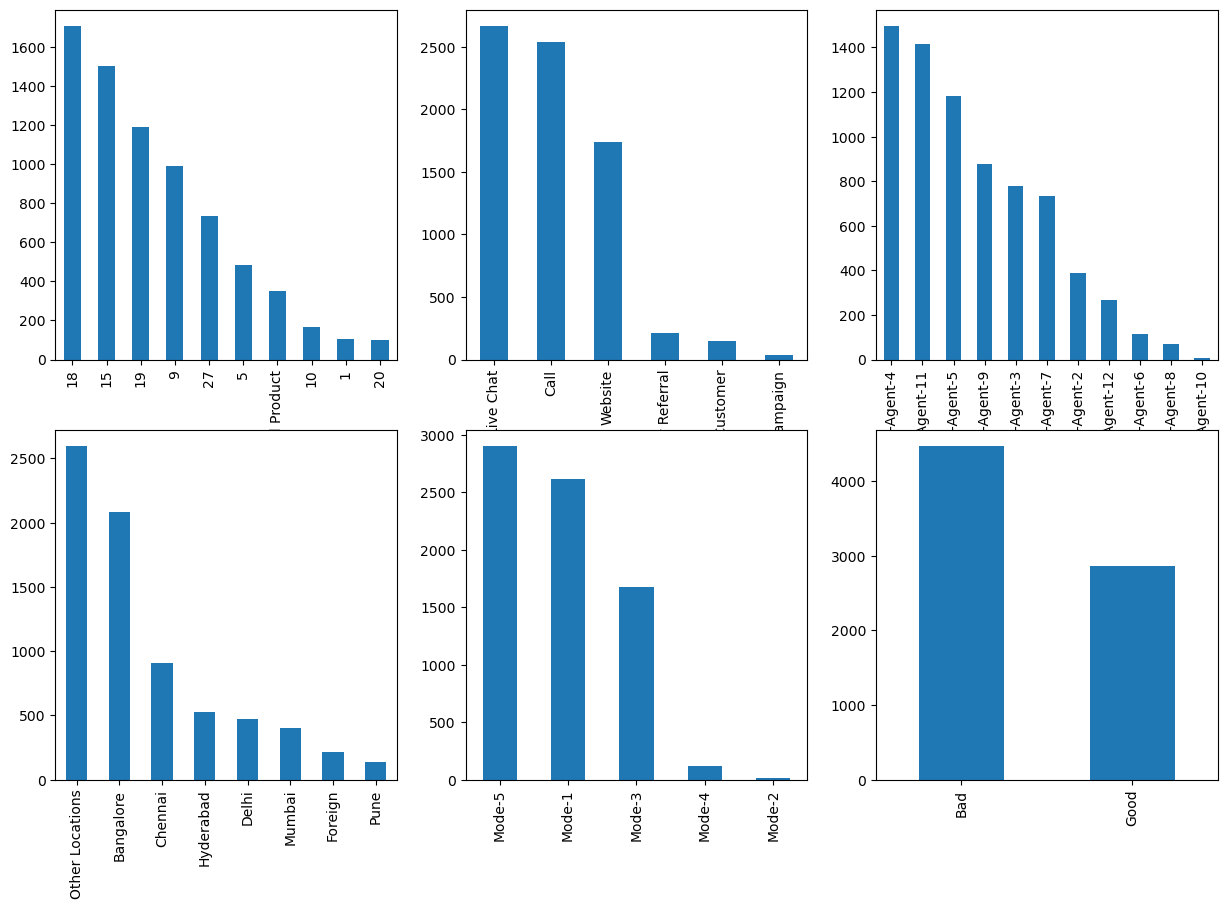

In [43]:
# Plotting the labels in each column
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
data.Product_ID.value_counts().plot(kind='bar')
plt.subplot(2,3,2)
data.Source.value_counts().plot(kind='bar')
plt.subplot(2,3,3)
data.Sales_Agent.value_counts().plot(kind='bar')
plt.subplot(2,3,4)
data.Location.value_counts().plot(kind='bar')
plt.subplot(2,3,5)
data.Delivery_Mode.value_counts().plot(kind='bar')
plt.subplot(2,3,6)
data.Status.value_counts().plot(kind='bar')

- In this graph, the count of six columns is displayed. Additionally, 
- this graph reveals that there are certain factors with a higher count compared to the count of other factors.

<Axes: xlabel='Delivery_Mode', ylabel='count'>

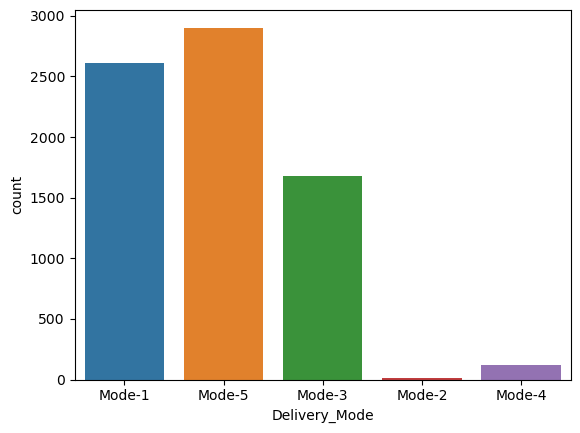

In [44]:
sns.countplot (x='Delivery_Mode',data=data)

-  in above graph comparisam between 5 mode of Delivery
- in above graph Mode-5 have higher value_counts it mean the range of near about 3000
- Mode-1 and Mode-5 have moderate value_ counts it means the range is above 2500 and 1500 respectively 
- Mode-2 and Mode-4 have very low range count so it may not to prefred.

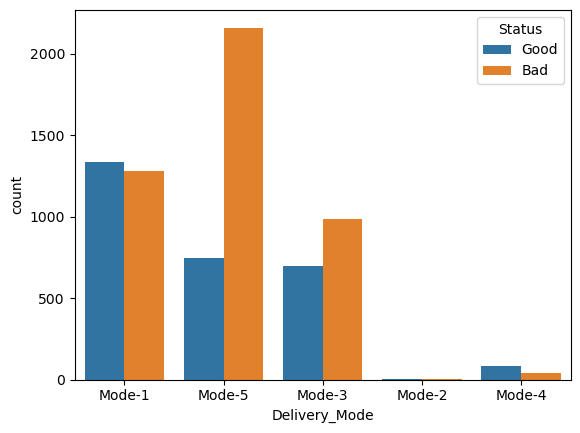

In [45]:
sns.countplot(x='Delivery_Mode',hue='Status',data=data)
plt.show()

- This graph visually compair with  the delivery mode with the status of delivery.
- above graph value of converted of delivery status is high from other in mode-5, mode-1
- in mode-5,Mode-1 and mode-3 have modrate counys of the delivery-status is Not Responding 
- For the remaining delivery modes, in which of them are the value counts for the delivery status category 'moderate' and in which are they 'low'

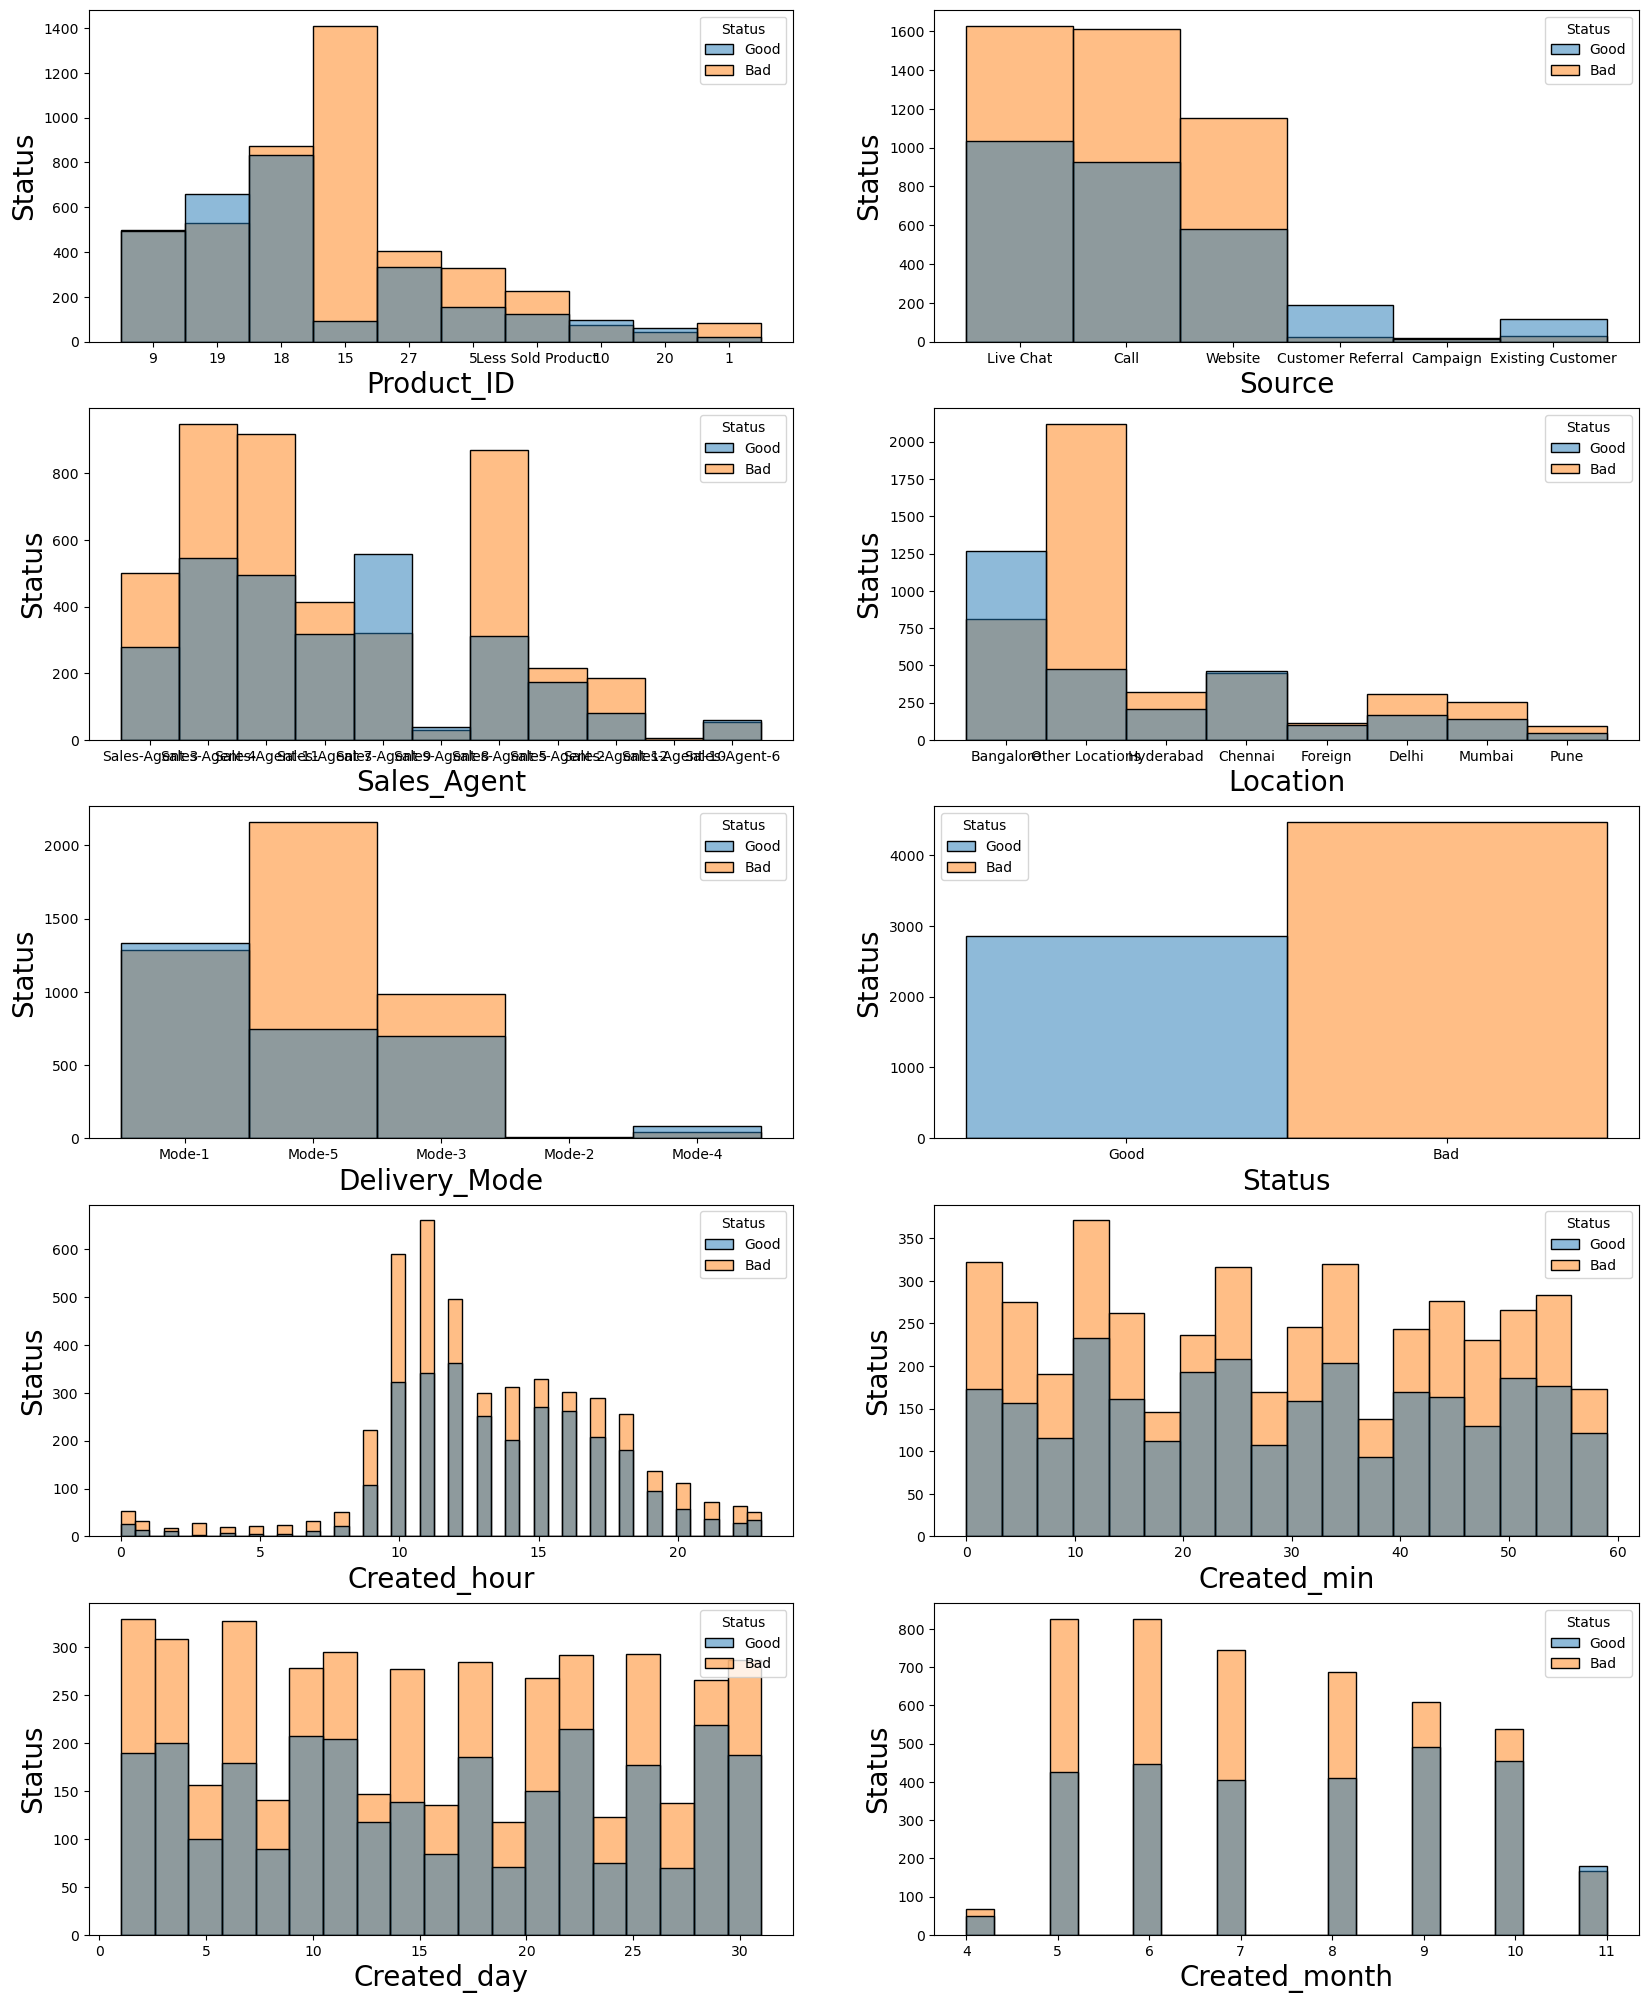

In [46]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10 : # as there are 10 columns in the dataset.
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=data[column],hue=data.Status)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Status',fontsize=20)
    plotnumber+=1
plt.show()

## From Above graphical representation and from sweetviz analysis we get insights:-


-  Product ID 15 has highest number of Nonpotential lead.

-  Delivery_Mode Mode-1 has only Potential Lead and Mode-4 also but having really less amount of deliveries from Mode-1.

-  There are most number of lead from Other Locations and having most number of Nonpotential Lead.

-  Sales_Agent 4,5 and 11 provides maximum no. of lead but most of them are Nonpotential.

-  From Source Call, Live Chat-Direct and Website we are getting highest no. of lead.

## Multi-Variate Analysis

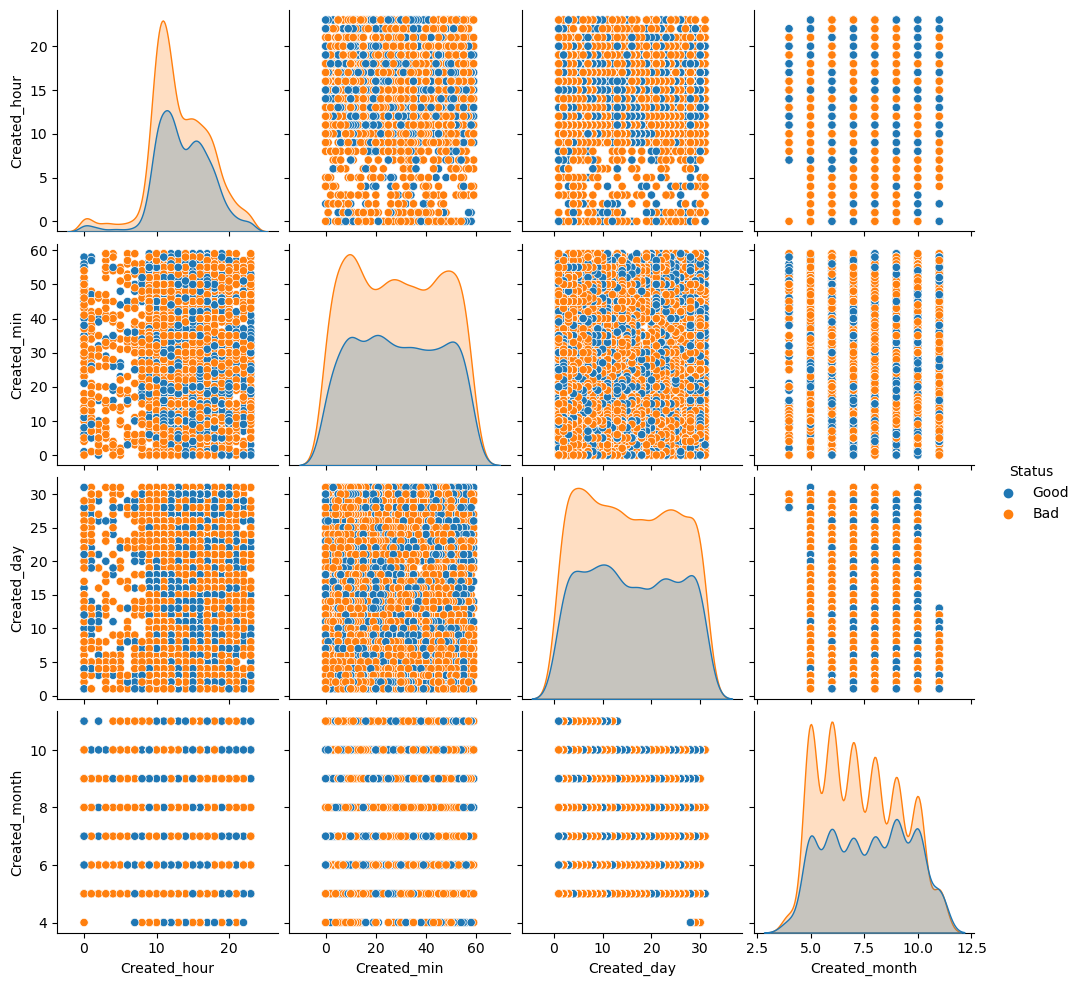

In [47]:
sns.pairplot(data, hue='Status')
plt.show()
     


- Multivariate analysis is a statistical method used to analyze data that involves multiple variables simultaneously.

- We used pairplot for the whole data to arrive at the multivariate report.

## DATA PREPROCESSING  

### Handling The Categorical Data

### 1. Project_ID

In [48]:
#Handling the Product_ID Using Label Encoder
data.Product_ID.unique()

array(['9', '19', '18', '15', '27', '5', 'Less Sold Product', '10', '20',
       '1'], dtype=object)

In [49]:
data.replace({'Less Sold Product':2},inplace=True)


In [50]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good,18,51,13,11
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good,18,48,13,11
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,Good,17,9,13,11
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad,16,49,13,11
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,Good,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7323,9,Call,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7324,15,Call,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7325,5,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7326,2,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


###  2.Source 

In [51]:
#Handling the Source Using Label Encoder

data.Source.unique()

array(['Live Chat', 'Call', 'Website', 'Customer Referral', 'Campaign',
       'Existing Customer'], dtype=object)

In [52]:
data.replace({'Live Chat':0, 'Call':1, 'Website':2, 'Customer Referral':3, 'Campaign':4, 'Existing Customer':5},inplace=True)



In [53]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,0,Sales-Agent-3,Bangalore,Mode-1,Good,18,51,13,11
1,19,1,Sales-Agent-4,Other Locations,Mode-5,Good,18,48,13,11
2,18,2,Sales-Agent-11,Other Locations,Mode-1,Good,17,9,13,11
3,15,2,Sales-Agent-7,Hyderabad,Mode-1,Bad,16,49,13,11
4,18,1,Sales-Agent-7,Bangalore,Mode-1,Good,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7323,9,1,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7324,15,1,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7325,5,0,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7326,2,5,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


### 3.Sales Agent 

In [54]:
data.Sales_Agent.unique()

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5',
       'Sales-Agent-2', 'Sales-Agent-12', 'Sales-Agent-10',
       'Sales-Agent-6'], dtype=object)

In [55]:
data.replace({'Sales-Agent-3':0, 'Sales-Agent-4':1, 'Sales-Agent-11':2, 'Sales-Agent-7':3, 'Sales-Agent-9':4,
              'Sales-Agent-8':5, 'Sales-Agent-5':6, 'Sales-Agent-2':7, 'Sales-Agent-12':8, 'Sales-Agent-10':9,
             'Sales-Agent-6':10},inplace=True)


In [56]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,0,0,Bangalore,Mode-1,Good,18,51,13,11
1,19,1,1,Other Locations,Mode-5,Good,18,48,13,11
2,18,2,2,Other Locations,Mode-1,Good,17,9,13,11
3,15,2,3,Hyderabad,Mode-1,Bad,16,49,13,11
4,18,1,3,Bangalore,Mode-1,Good,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7323,9,1,10,Mumbai,Mode-4,Bad,9,45,28,4
7324,15,1,8,Other Locations,Mode-5,Bad,9,43,28,4
7325,5,0,2,Bangalore,Mode-1,Bad,9,20,28,4
7326,2,5,1,Other Locations,Mode-1,Bad,8,4,28,4


### 4.Location

In [57]:
data.Location.unique()

array(['Bangalore', 'Other Locations', 'Hyderabad', 'Chennai', 'Foreign',
       'Delhi', 'Mumbai', 'Pune'], dtype=object)

In [58]:
data.replace({'Bangalore':0, 'Other Locations':1, 'Hyderabad':2, 'Chennai':3, 'Foreign':4,
              'Delhi':5, 'Mumbai':6, 'Pune':7,},inplace=True)


In [59]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,0,0,0,Mode-1,Good,18,51,13,11
1,19,1,1,1,Mode-5,Good,18,48,13,11
2,18,2,2,1,Mode-1,Good,17,9,13,11
3,15,2,3,2,Mode-1,Bad,16,49,13,11
4,18,1,3,0,Mode-1,Good,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7323,9,1,10,6,Mode-4,Bad,9,45,28,4
7324,15,1,8,1,Mode-5,Bad,9,43,28,4
7325,5,0,2,0,Mode-1,Bad,9,20,28,4
7326,2,5,1,1,Mode-1,Bad,8,4,28,4


### 5.Delivery Mode 

In [60]:
data.Delivery_Mode.unique()

array(['Mode-1', 'Mode-5', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [61]:
data.replace({'Mode-1':0, 'Mode-5':1, 'Mode-3':2, 'Mode-2':3, 'Mode-4':4},inplace=True)


In [62]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,0,0,0,0,Good,18,51,13,11
1,19,1,1,1,1,Good,18,48,13,11
2,18,2,2,1,0,Good,17,9,13,11
3,15,2,3,2,0,Bad,16,49,13,11
4,18,1,3,0,0,Good,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7323,9,1,10,6,4,Bad,9,45,28,4
7324,15,1,8,1,1,Bad,9,43,28,4
7325,5,0,2,0,0,Bad,9,20,28,4
7326,2,5,1,1,0,Bad,8,4,28,4


### 6.Status 

In [63]:
data.Status.unique()

array(['Good', 'Bad'], dtype=object)

In [64]:
data.replace({'Good':0, 'Bad':1},inplace=True)


In [65]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,0,0,0,0,0,18,51,13,11
1,19,1,1,1,1,0,18,48,13,11
2,18,2,2,1,0,0,17,9,13,11
3,15,2,3,2,0,1,16,49,13,11
4,18,1,3,0,0,0,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7323,9,1,10,6,4,1,9,45,28,4
7324,15,1,8,1,1,1,9,43,28,4
7325,5,0,2,0,0,1,9,20,28,4
7326,2,5,1,1,0,1,8,4,28,4


###  All Categorical Variables are Converted into Numerical variable

In [66]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,0,0,0,0,0,18,51,13,11
1,19,1,1,1,1,0,18,48,13,11
2,18,2,2,1,0,0,17,9,13,11
3,15,2,3,2,0,1,16,49,13,11
4,18,1,3,0,0,0,16,37,13,11


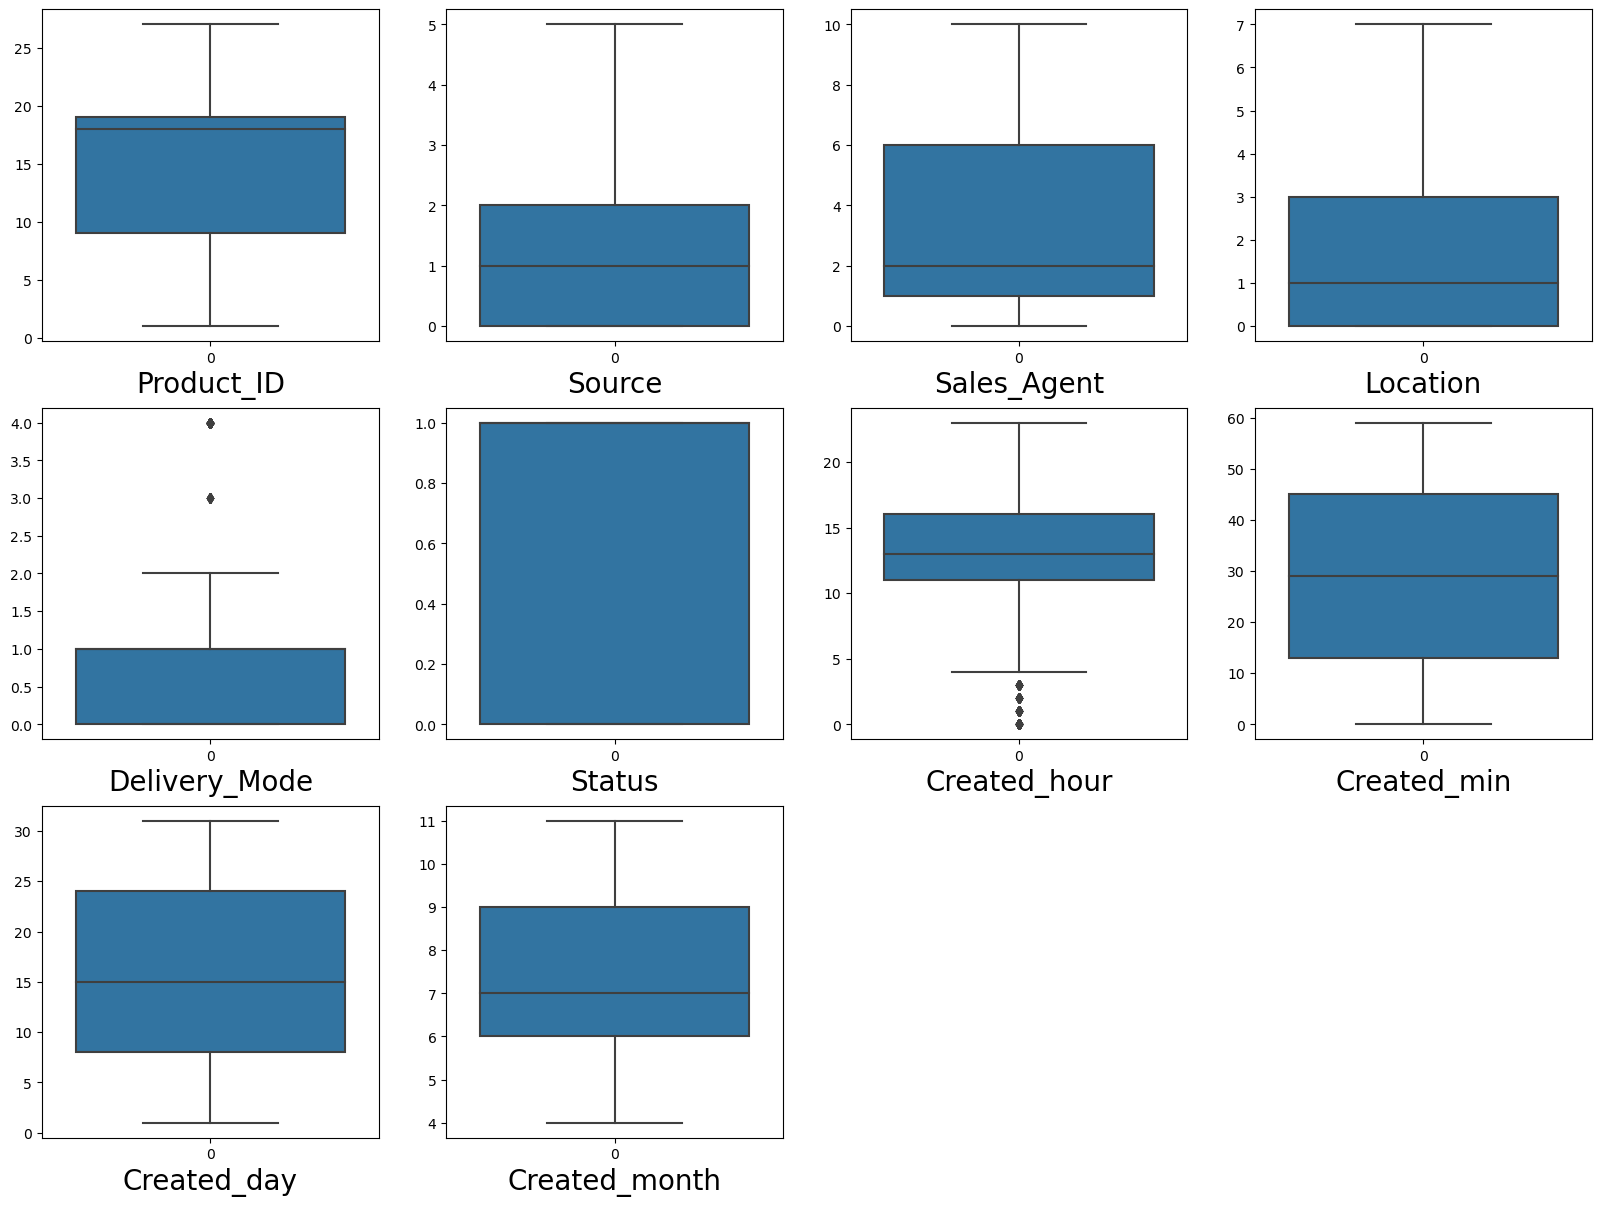

In [67]:
#checking outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=20 :    
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()


Here We see that in Two Columns Outliers are present

Text(0.5, 1.0, 'Box Plot of Delivery Mode')

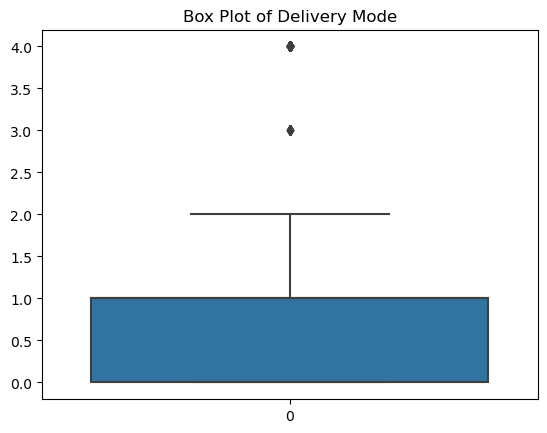

In [68]:
sns.boxplot(data['Delivery_Mode'])
plt.title('Box Plot of Delivery Mode')

In [69]:
def out1(num_out):
    q1=(num_out).quantile(0.25)
    q3=(num_out).quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5)*iqr
    upper=q3+(1.5)*iqr

    return lower,upper

In [70]:
lower,upper=out1(data['Delivery_Mode'])
print(lower, upper)

-1.5 2.5


In [71]:
lower, upper = out1(data['Delivery_Mode'])
print(lower, upper)

data = data[(data['Delivery_Mode'] > lower) & (data['Delivery_Mode'] < upper)]
data

-1.5 2.5


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,0,0,0,0,0,18,51,13,11
1,19,1,1,1,1,0,18,48,13,11
2,18,2,2,1,0,0,17,9,13,11
3,15,2,3,2,0,1,16,49,13,11
4,18,1,3,0,0,0,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7322,19,0,4,1,2,1,10,0,28,4
7324,15,1,8,1,1,1,9,43,28,4
7325,5,0,2,0,0,1,9,20,28,4
7326,2,5,1,1,0,1,8,4,28,4


<Axes: >

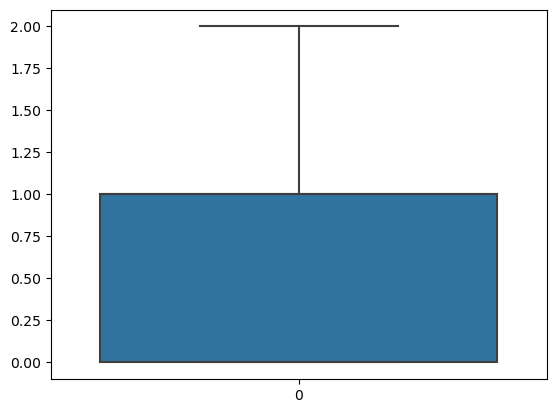

In [72]:
sns.boxplot(data['Delivery_Mode'])


In [73]:
data.shape

(7198, 10)

<Axes: >

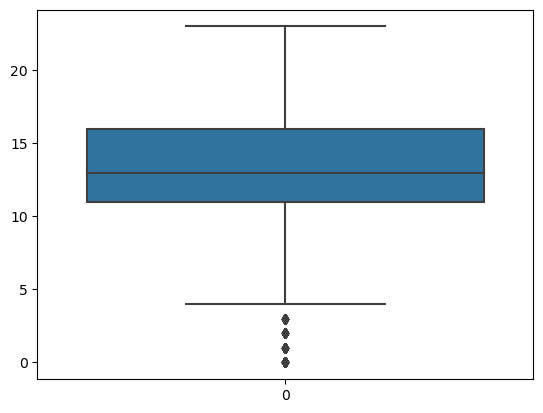

In [74]:
sns.boxplot(data['Created_hour'])

In [75]:
def out1(num_out):
    q1=(num_out).quantile(0.25)
    q3=(num_out).quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5)*iqr
    upper=q3+(1.5)*iqr

    return lower,upper

In [76]:
lower,upper=out1(data['Created_hour'])
print(lower, upper)

3.5 23.5


In [77]:
lower, upper = out1(data['Created_hour'])
print(lower, upper)

data = data[(data['Created_hour'] > lower) & (data['Created_hour'] < upper)]
data

3.5 23.5


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,0,0,0,0,0,18,51,13,11
1,19,1,1,1,1,0,18,48,13,11
2,18,2,2,1,0,0,17,9,13,11
3,15,2,3,2,0,1,16,49,13,11
4,18,1,3,0,0,0,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7322,19,0,4,1,2,1,10,0,28,4
7324,15,1,8,1,1,1,9,43,28,4
7325,5,0,2,0,0,1,9,20,28,4
7326,2,5,1,1,0,1,8,4,28,4


<Axes: >

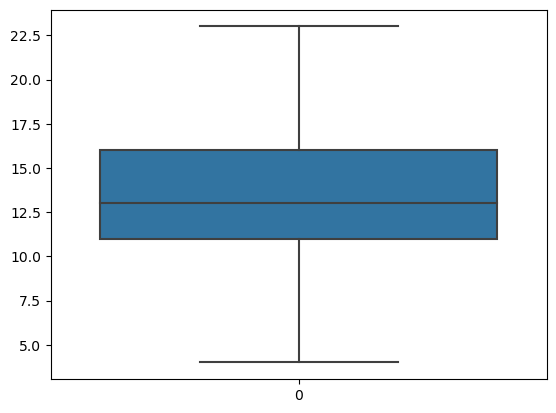

In [78]:
sns.boxplot(data['Created_hour'])

###  Checking That All Outliers Removed

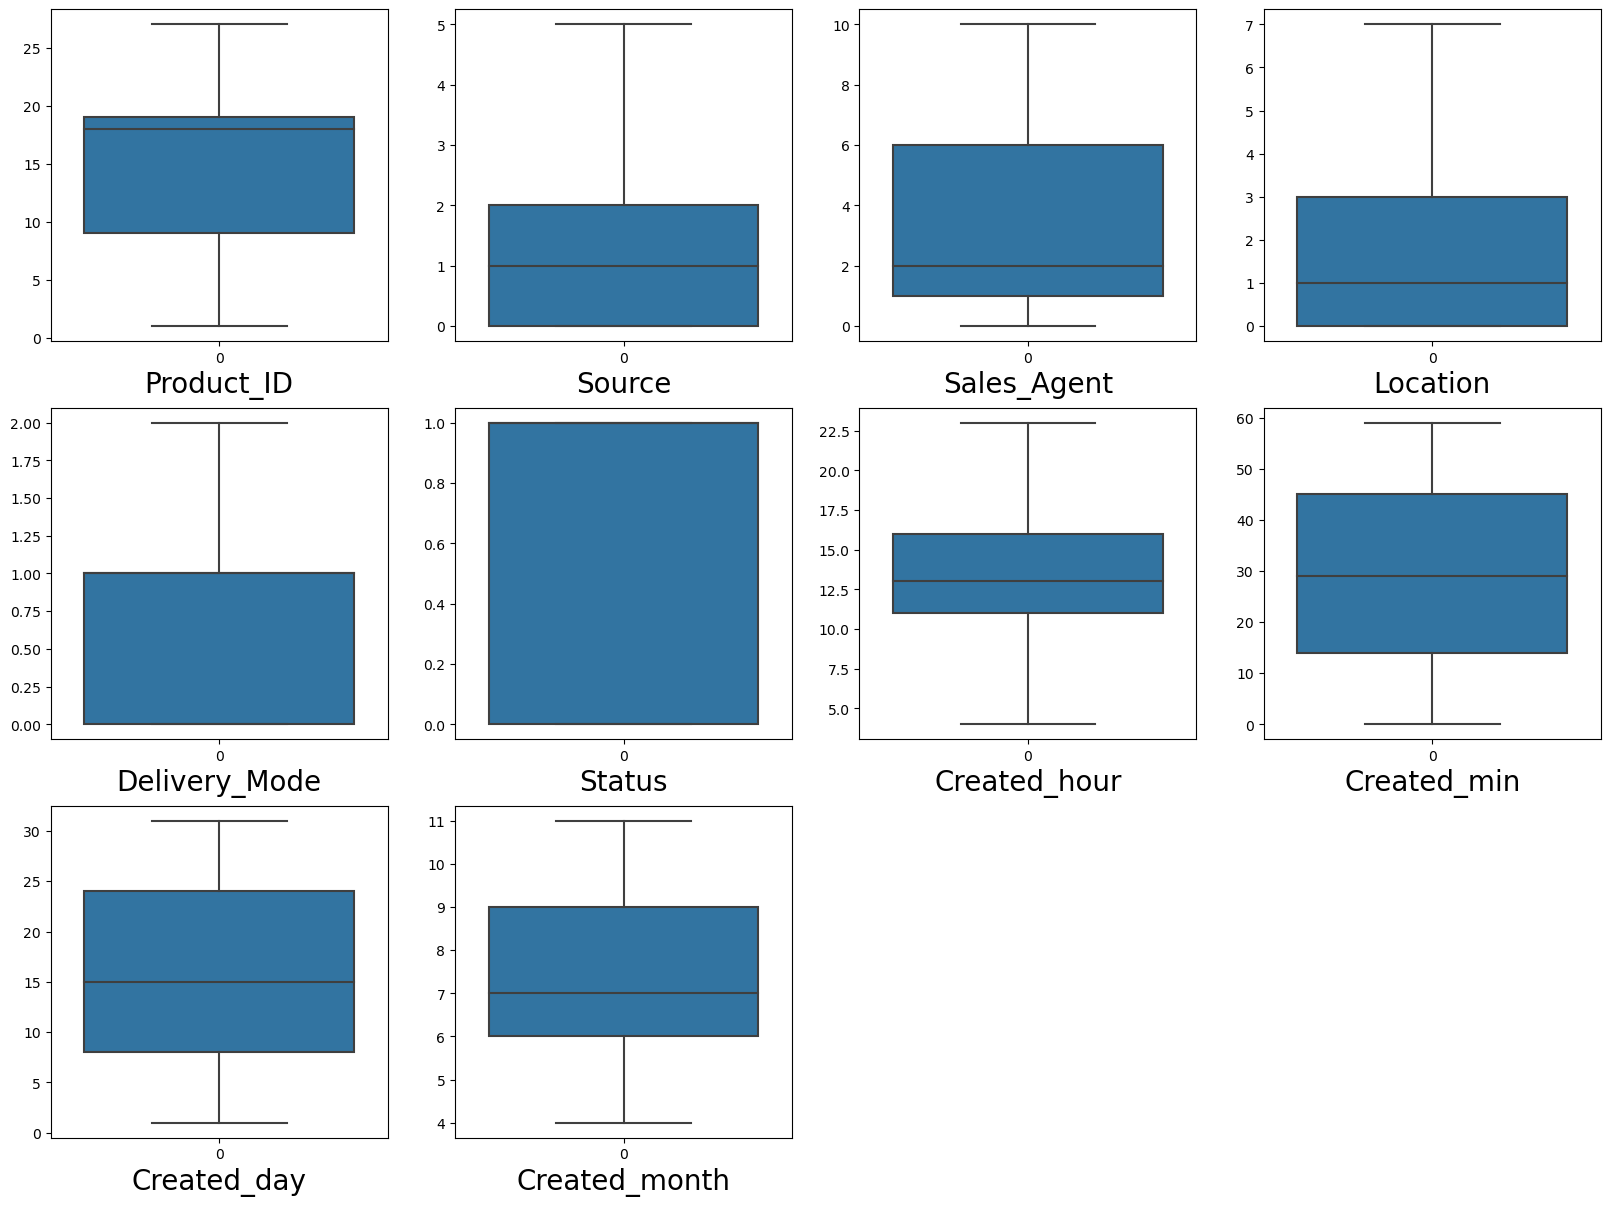

In [79]:
#checking outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=20 :    
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()


Here we Check That the all Outliers are removed

## Feature Selection

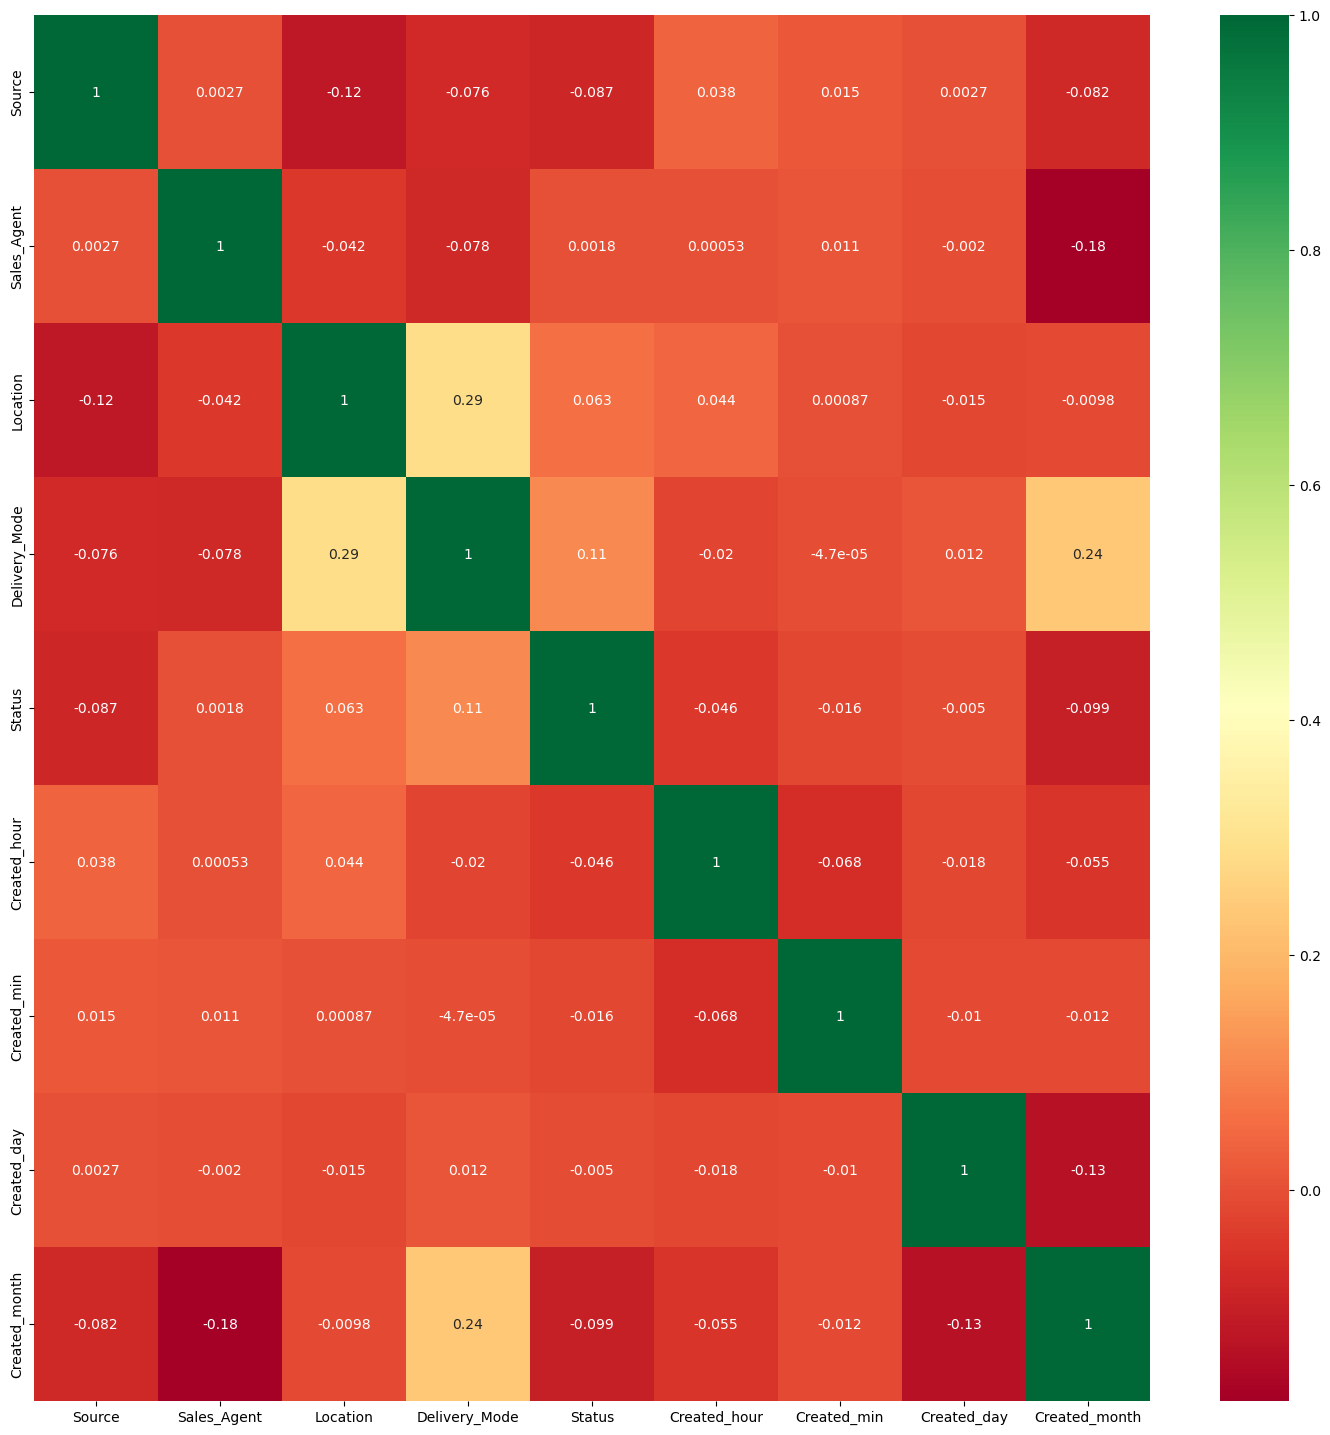

In [80]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

- With the Help of Feature selection we can eliminate irrelevant or redundant features.

- The model will focus on the information that truly matters for prediction. This can lead to more accurate and generalizable models, avoiding issues like overfitting.

- To see how our features are interrelated, we used Seaborn's heatmap function. This will create a visual representation of correlations between the features in our data.

## DATA SPLITTING

In [81]:
# Creating Dependent and independent variable
x=data.drop(columns = ['Status'])
y=data['Status'] 

In [82]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size= 0.25,random_state=42)

In [83]:
x_train

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Created_hour,Created_min,Created_day,Created_month
1995,19,0,2,5,2,16,30,12,9
5257,15,1,2,1,1,15,14,18,6
2830,19,1,2,3,1,11,30,21,8
5023,19,2,0,0,1,11,6,22,6
4563,19,2,6,2,2,11,3,4,7
...,...,...,...,...,...,...,...,...,...
3935,19,0,1,4,1,17,55,20,7
5407,9,2,4,0,1,23,53,13,6
5443,18,2,1,3,2,12,14,13,6
5612,9,2,0,0,0,11,23,9,6


In [84]:
x_test

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Created_hour,Created_min,Created_day,Created_month
3122,15,2,6,1,1,12,7,12,8
4787,9,1,2,6,1,10,39,28,6
257,18,1,0,6,0,11,17,5,11
1522,27,1,2,0,1,16,37,25,9
1902,9,0,0,3,2,12,55,15,9
...,...,...,...,...,...,...,...,...,...
4404,15,1,2,1,1,11,10,9,7
1963,18,0,2,0,0,9,50,14,9
893,18,0,3,0,0,10,41,15,10
3537,27,2,6,2,0,23,49,31,7


- Splitting data into training and testing sets helps us to avoid overfitting (memorizing training data).

- It ensures the model to perform its task hastily.

## SCALING 

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
     

In [86]:
x_train_scaled, x_test_scaled


(array([[ 0.57804226, -0.98172932, -0.48251302, ...,  0.07473601,
         -0.40597344,  0.82454458],
        [-0.04173261,  0.01844069, -0.48251302, ..., -0.84755959,
          0.26074305, -0.78886815],
        [ 0.57804226,  0.01844069, -0.48251302, ...,  0.07473601,
          0.5941013 ,  0.28674033],
        ...,
        [ 0.42309855,  1.01861071, -0.89247765, ..., -0.84755959,
         -0.29485403, -0.78886815],
        [-0.97139491,  1.01861071, -1.30244227, ..., -0.32876832,
         -0.73933169, -0.78886815],
        [ 0.57804226,  0.01844069, -0.48251302, ...,  0.42059686,
         -0.0726152 ,  1.36234882]]),
 array([[-0.04173261,  1.01861071,  1.1573455 , ..., -1.25106392,
         -0.40597344,  0.28674033],
        [-0.97139491,  0.01844069, -0.48251302, ...,  0.59352729,
          1.3719372 , -0.78886815],
        [ 0.42309855,  0.01844069, -1.30244227, ..., -0.67462917,
         -1.18380935,  1.90015306],
        ...,
        [ 0.42309855, -0.98172932, -0.07254839, ...,  

In [87]:
x_train.columns


Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Created_hour', 'Created_min', 'Created_day', 'Created_month'],
      dtype='object')

Scaling in machine learning prevents features with larger values from dominating calculations and ensures all features contribute fairly, leading to better model performance.

After the use of StandardScaler to transform training and testing data, we converted them back into DataFrames. The two main reason for doing this is that it preserves Column Labels and enables further Data Exploration

## BALANCING THE DATA 

In [88]:
y_train.value_counts()


1    3262
0    1999
Name: Status, dtype: int64

In [89]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(x_train, y_train)
     

In [90]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({1: 3262, 0: 1999})
Counter({0: 3262, 1: 3262})


## MODEL CREATION

## USING LOGISTICS REGRESSION

In [91]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, classification_report, recall_score


In [92]:
## model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [93]:
y_pred = log_reg.predict(x_test)


In [94]:
accuracy_score(y_test,y_pred)


0.62884834663626

In [95]:
precision_score(y_test,y_pred, average='weighted')


0.6308415789261655

In [96]:
recall_score(y_test,y_pred)


0.9059165858389913

In [97]:
f1_score_LR = f1_score(y_test, y_pred)

print(f1_score_LR)

0.7415641127431521


In [98]:
confusion_matrix(y_test,y_pred)


array([[169, 554],
       [ 97, 934]], dtype=int64)

In [99]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.64      0.23      0.34       723
           1       0.63      0.91      0.74      1031

    accuracy                           0.63      1754
   macro avg       0.63      0.57      0.54      1754
weighted avg       0.63      0.63      0.58      1754



Logistic regression is a type of regression analysis used to predict the probability of a binary outcome based on one or more predictor variables.

In this model, we are using scikit-learn's logistic regression.

And therefore using the model of logistic regression, we achieved the accuracy score of 63%.

## KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

In [101]:
y_pred_knn = knn_classifier.predict(x_test)


In [102]:
accuracy_score(y_test,y_pred_knn)


0.5974914481185861

In [103]:
precision_score(y_test,y_pred_knn, average='weighted')


0.6079166493275466

In [104]:
recall_score(y_test,y_pred_knn)


0.6042677012609118

In [105]:
f1_score_knn = f1_score(y_test, y_pred_knn)

print(f1_score_knn)

0.6383196721311475


In [106]:
confusion_matrix(y_test,y_pred_knn)


array([[425, 298],
       [408, 623]], dtype=int64)

In [107]:
print(classification_report(y_test,y_pred_knn))


              precision    recall  f1-score   support

           0       0.51      0.59      0.55       723
           1       0.68      0.60      0.64      1031

    accuracy                           0.60      1754
   macro avg       0.59      0.60      0.59      1754
weighted avg       0.61      0.60      0.60      1754



K-Nearest Neighbors (KNN) is a simple and effective supervised learning algorithm used for classification and regression tasks.

In this model, we are using scikit-learn's KNeighborsClassifier and we set the parameter (n_neighbors=5) to create and train a K-Nearest Neighbors (KNN) classifier.

And therefore using the model of KNN, we achieved the accuracy score of 60%.

## DECISION TREE 

In [108]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')
dt.fit(x_train,y_train)
y_hat=dt.predict(x_test)
y_hat

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [109]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    
##Training score
y_train_predict=dt.predict(x_train)
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

0.7810302223911804

In [110]:
print(classification_report(y_train,y_train_predict))


              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1999
           1       0.81      0.85      0.83      3262

    accuracy                           0.78      5261
   macro avg       0.77      0.76      0.76      5261
weighted avg       0.78      0.78      0.78      5261



using the model of decision tree, we achieved the accuracy score of 77%.

In [111]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1
Status,,
0,1338,661
1,491,2771


## HYPERPARAMETRE TUNNING FOR DECISION TREE

In [112]:
from sklearn.model_selection import GridSearchCV


In [113]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)


tree_cv.fit(x_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [114]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [115]:
tree_cv.best_score_

0.777932628674798

In [116]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [117]:
print(classification_report(y_test,y_hat))#it will give precision,recall,f1 scores and accuracy 


              precision    recall  f1-score   support

           0       0.63      0.52      0.57       723
           1       0.70      0.79      0.74      1031

    accuracy                           0.68      1754
   macro avg       0.66      0.65      0.65      1754
weighted avg       0.67      0.68      0.67      1754



-  By applying the decision tree algorithm accuracy gives the 77% But after the Hyper Parameter Tunning the accuracy are decreases

## RANDOM FOREST CLASSIFIER 

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)


RandomForestClassifier()

In [119]:
y_pred3=rf_clf.predict(x_test)


In [120]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58       723
           1       0.71      0.81      0.76      1031

    accuracy                           0.69      1754
   macro avg       0.69      0.67      0.67      1754
weighted avg       0.69      0.69      0.69      1754



We used a Random Forest model to tackle large and complex datasets and we chosen the important parameters to prevent the model from overfitting


Random state Sets a seed which ensures that the same sequence of random numbers are generated each time when we run the algorithm with the same data

After making predictions on x_test, we achieved an accuracy score of 69%.

## ANN

In [121]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes  = (40,4),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=40, activation = 'logistic')
model.fit(x_train_smote,y_train_smote)
y_predict_proba = model.predict_proba(x_test)
y_predict = model.predict(x_test)
y_train_predict = model.predict(x_train_smote)

print('Test acuracy :', accuracy_score(y_test,y_predict))

Test acuracy : 0.4122006841505131


In [122]:
precision_score(y_test,y_predict)


0.0

In [123]:
recall_score(y_test,y_predict)


0.0

In [124]:
f1_score_ANN = f1_score(y_test, y_predict)

print(f1_score_ANN)
     

0.0


In [125]:
confusion_matrix(y_test,y_predict)


array([[ 723,    0],
       [1031,    0]], dtype=int64)

In [126]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.41      1.00      0.58       723
           1       0.00      0.00      0.00      1031

    accuracy                           0.41      1754
   macro avg       0.21      0.50      0.29      1754
weighted avg       0.17      0.41      0.24      1754



ANN stands for Artificial Neural Network, which is a computational model inspired by the structure and functioning of biological neural networks in the human brain.

In this model, we are using scikit-learn's MLPClassifier, which is a type of artificial neural network classifier to make the model arrive at the best accuracy possible.

Our ANN model gave us the accuracy score of 62%.

In [127]:
data = pd.DataFrame()
data['Model'] = ['Logistics','KNN','Decision Tree','Random Forest','ANN']
data['Accuracy'] = [0.63,0.61,0.77,0.69,0.62]
data


,Model,Accuracy
0,Logistics,0.63
1,KNN,0.61
2,Decision Tree,0.77
3,Random Forest,0.69
4,ANN,0.62


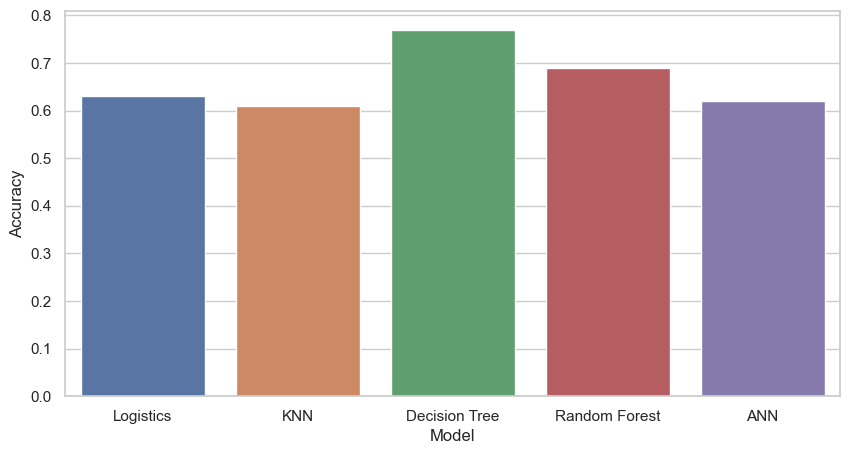

In [128]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.barplot(x='Model',y = 'Accuracy',data = data)

## DEPLOYMENT  

In [129]:
import os
import pickle

folder_name = 'Client Project Datamites'
file_name = 'model.pkl'

model = {'key': 'value'}

# Construct full file path
file_path = os.path.join('C:\\Users\\komal\\desktop', folder_name, file_name)

# Write the model to the file
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved successfully to: {file_path}')

Model saved successfully to: C:\Users\komal\desktop\Client Project Datamites\model.pkl


## CHALLENGES FACED

1. Analysing the Data:

- Most of the columns have a lot of different labels. Therefore we found difficult to alter, expand or to even drop which of the column according to our needs.

2. Model Training and Evaluation:

- Model Selection and Interpretation: We found difficult to choose the best model and to understand its predictions can be challenging With various algorithms available.

- We found the implementation of model difficult because selecting the most suitable model requires careful consideration.

## CONCLUSION  

- We have achieved the project goal of effectively plotting the visual representation of the dataset and a machine learning model to predict the lead category.

- The project is done with the purpose of finding out the Lead category, and as result, expecting significant increase in sales effectiveness.

- After the complete analysis of the dataset, we arrive at the conclusion that Decision Tree is the best suitable output model that gives 77 percent accuracy score. 